In [285]:
#### Load Data
## refer by  : https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/
#######################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df = pd.read_csv('file_price_house/train_clean.csv')
df_test = pd.read_csv('file_price_house/test_clean.csv')

#df_train = pd.read_csv('file_price_house/train.csv')
#df_test = pd.read_csv('file_price_house/test_clean.csv')
#print(df.feature_names)



df.head()


,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,is_select_YearRemodAdd,is_select_MasVnrArea,is_select_Fireplaces,is_select_GarageYrBlt,is_select_BsmtFinSF1,is_select_LotFrontage,is_select_WoodDeckSF,is_select_2ndFlrSF,is_select_OpenPorchSF,is_select_HalfBath
0,0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,...,2003.0,164.25,0.0,2001.0,706.00,65.0,0.0,728.0,61.0,1.0
1,1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,...,1976.0,0.00,1.0,1976.0,712.25,79.0,168.0,0.0,0.0,0.0
2,2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,...,2002.0,162.00,1.0,2001.0,486.00,68.0,0.0,728.0,42.0,1.0
3,3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,...,1970.0,0.00,1.0,1998.0,216.00,60.0,0.0,728.0,35.0,0.0
4,4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,...,2000.0,164.25,1.0,2000.0,655.00,79.0,168.0,728.0,68.0,1.0


In [291]:
#df_numeric = df.select_dtypes(include=[np.number])
#numeric_cols = df_numeric.columns.values

IsSelect = [col for col in df.columns if 'is_select_'  in col] 
IsSelect.insert(0, 'Id')
IsSelect.insert(1, 'SalePrice')
  
df_numeric  = df[IsSelect]
numeric_cols = IsSelect

if set(['SalePrice']).issubset(df.columns):
    df_numeric["SalePrice"] = df_numeric["is_select_SalePrice"]
    df_numeric = df_numeric.drop('is_select_SalePrice', axis=1)
    IsSelect.remove("is_select_SalePrice")

print("----------------------------------------")
print("### numeric columns -> ",len(numeric_cols))
print(numeric_cols) 


df_numeric.head()
 


----------------------------------------
### numeric columns ->  21
['Id', 'SalePrice', 'is_select_OverallQual', 'is_select_GrLivArea', 'is_select_GarageCars', 'is_select_GarageArea', 'is_select_TotalBsmtSF', 'is_select_1stFlrSF', 'is_select_FullBath', 'is_select_TotRmsAbvGrd', 'is_select_YearBuilt', 'is_select_YearRemodAdd', 'is_select_MasVnrArea', 'is_select_Fireplaces', 'is_select_GarageYrBlt', 'is_select_BsmtFinSF1', 'is_select_LotFrontage', 'is_select_WoodDeckSF', 'is_select_2ndFlrSF', 'is_select_OpenPorchSF', 'is_select_HalfBath']


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Id,SalePrice,is_select_OverallQual,is_select_GrLivArea,is_select_GarageCars,is_select_GarageArea,is_select_TotalBsmtSF,is_select_1stFlrSF,is_select_FullBath,is_select_TotRmsAbvGrd,...,is_select_YearRemodAdd,is_select_MasVnrArea,is_select_Fireplaces,is_select_GarageYrBlt,is_select_BsmtFinSF1,is_select_LotFrontage,is_select_WoodDeckSF,is_select_2ndFlrSF,is_select_OpenPorchSF,is_select_HalfBath
0,1,208500.0,7.0,1710.00,2.0,548.0,856.0,856.0,2.0,7.0,...,2003.0,164.25,0.0,2001.0,706.00,65.0,0.0,728.0,61.0,1.0
1,2,181500.0,6.0,1262.00,2.0,460.0,1262.0,1262.0,2.0,6.0,...,1976.0,0.00,1.0,1976.0,712.25,79.0,168.0,0.0,0.0,0.0
2,3,214000.0,7.0,1776.75,2.0,576.0,920.0,920.0,2.0,6.0,...,2002.0,162.00,1.0,2001.0,486.00,68.0,0.0,728.0,42.0,1.0
3,4,140000.0,7.0,1717.00,2.0,576.0,756.0,961.0,1.0,7.0,...,1970.0,0.00,1.0,1998.0,216.00,60.0,0.0,728.0,35.0,0.0
4,5,214000.0,7.0,1776.75,2.0,576.0,1145.0,1145.0,2.0,7.0,...,2000.0,164.25,1.0,2000.0,655.00,79.0,168.0,728.0,68.0,1.0


In [292]:
#Create train and test set
#########################
from sklearn.model_selection import train_test_split
train , test = train_test_split(df_numeric, test_size = 0.3) 


x_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']

x_test = test.drop('SalePrice', axis = 1)
y_test = test['SalePrice']
  

#x_train.head()
print(x_train.shape)
#y_train.head()
print(y_train.shape)
#x_test.head()
print(x_test.shape)
#y_test.head()
print(y_test.shape)



(1022, 20)
(1022,)
(438, 20)
(438,)


In [293]:
x_train.head()

,Id,is_select_OverallQual,is_select_GrLivArea,is_select_GarageCars,is_select_GarageArea,is_select_TotalBsmtSF,is_select_1stFlrSF,is_select_FullBath,is_select_TotRmsAbvGrd,is_select_YearBuilt,is_select_YearRemodAdd,is_select_MasVnrArea,is_select_Fireplaces,is_select_GarageYrBlt,is_select_BsmtFinSF1,is_select_LotFrontage,is_select_WoodDeckSF,is_select_2ndFlrSF,is_select_OpenPorchSF,is_select_HalfBath
1232,1233,4.0,1224.00,2.0,462.0,0.00,1224.00,2.0,6.0,1962.0,1962.0,0.0,0.0,1962.0,0.00,70.0,0.0,0.0,0.0,0.0
1260,1261,6.0,1675.00,2.0,502.0,841.00,892.00,2.0,7.0,1999.0,1999.0,0.0,1.0,1999.0,0.00,69.0,0.0,728.0,68.0,1.0
902,903,7.0,1509.00,2.0,393.0,783.00,807.00,2.0,7.0,2000.0,2003.0,0.0,1.0,2001.0,0.00,63.0,0.0,702.0,68.0,1.0
1278,1279,7.0,1776.75,2.0,576.0,1128.00,1128.00,2.0,7.0,2000.0,2002.0,0.0,1.0,2001.0,712.25,75.0,0.0,728.0,68.0,1.0
642,643,7.0,1776.75,2.0,538.0,1298.25,1391.25,2.0,7.0,1972.0,1995.0,0.0,1.0,1972.0,712.25,75.0,168.0,704.0,68.0,1.0


In [294]:
x_test.head()

,Id,is_select_OverallQual,is_select_GrLivArea,is_select_GarageCars,is_select_GarageArea,is_select_TotalBsmtSF,is_select_1stFlrSF,is_select_FullBath,is_select_TotRmsAbvGrd,is_select_YearBuilt,is_select_YearRemodAdd,is_select_MasVnrArea,is_select_Fireplaces,is_select_GarageYrBlt,is_select_BsmtFinSF1,is_select_LotFrontage,is_select_WoodDeckSF,is_select_2ndFlrSF,is_select_OpenPorchSF,is_select_HalfBath
981,982,7.0,1776.75,2.0,576.0,1225.00,1276.00,2.0,7.0,1998.0,1999.0,164.25,1.0,1998.0,712.25,79.0,168.0,728.0,0.0,1.0
651,652,4.0,1510.00,1.0,296.0,755.00,755.00,1.0,7.0,1940.0,1950.0,0.00,1.0,1940.0,0.00,60.0,120.0,728.0,0.0,0.0
227,228,6.0,987.00,1.0,280.0,483.00,483.00,1.0,5.0,1970.0,1970.0,127.00,0.0,1987.0,321.00,21.0,0.0,504.0,0.0,1.0
113,114,6.0,1776.75,2.0,450.0,1298.25,1391.25,2.0,7.0,1953.0,1953.0,164.25,1.0,1953.0,35.00,69.0,166.0,0.0,68.0,0.0
382,383,7.0,1776.75,2.0,576.0,939.00,939.00,2.0,7.0,2000.0,2004.0,0.00,0.0,2001.0,0.00,79.0,144.0,728.0,53.0,1.0


In [295]:
# Preprocessing – Scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [296]:
#Let us have a look at the error rate for different k values
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [298]:
    from sklearn import metrics 

    rmse_val = [] #to store rmse values for different k
    for K in range(20):
        K = K+1
        model = neighbors.KNeighborsRegressor(n_neighbors = K)

        model.fit(x_train, y_train)  #fit the model
        pred=model.predict(x_test) #make prediction on test set
        error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
        #accurency = metrics.accuracy_score(y_test, pred)
        rmse_val.append(error) #store rmse values
        print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 25982.488462441645
RMSE value for k=  2 is: 21389.956660440017
RMSE value for k=  3 is: 20992.456531164622
RMSE value for k=  4 is: 19972.835184757678
RMSE value for k=  5 is: 19316.23088149956
RMSE value for k=  6 is: 19231.22401248861
RMSE value for k=  7 is: 19018.515805429844
RMSE value for k=  8 is: 18691.826905095444
RMSE value for k=  9 is: 18701.491887992015
RMSE value for k=  10 is: 18771.15516603045
RMSE value for k=  11 is: 18770.681287379954
RMSE value for k=  12 is: 18711.501185353303
RMSE value for k=  13 is: 18741.441397781844
RMSE value for k=  14 is: 18817.640223274368
RMSE value for k=  15 is: 18911.884043210386
RMSE value for k=  16 is: 18836.76184938685
RMSE value for k=  17 is: 18917.616084573554
RMSE value for k=  18 is: 19015.664313284346
RMSE value for k=  19 is: 18992.48768481413
RMSE value for k=  20 is: 19120.88828045157


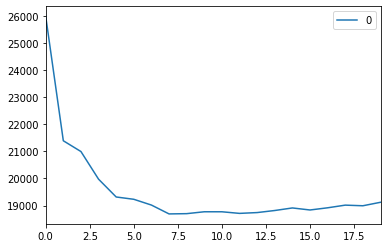

In [299]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [300]:
### จากกราฟเราเลือก k = 10 เพราะ มองว่า stable มากสุด
## RMSE value for k=  10 is: 45433.85126002181 ยิ่งน้อยยิ่งดี
####################################################
train_ID = df['Id']
test_ID = df_test['Id']

#  drop the 'Id'   ไม่จำเป็น
df.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

# Check data size after dropping the 'Id' variable
print("\nThe Train Data size : {} ".format(df.shape)) 
print("The Test data size  : {} ".format(df_test.shape))



The Train Data size : (1460, 97) 
The Test data size  : (1459, 96) 


In [301]:
# ข้อมูล train
df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,is_select_YearRemodAdd,is_select_MasVnrArea,is_select_Fireplaces,is_select_GarageYrBlt,is_select_BsmtFinSF1,is_select_LotFrontage,is_select_WoodDeckSF,is_select_2ndFlrSF,is_select_OpenPorchSF,is_select_HalfBath
0,0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,2003.0,164.25,0.0,2001.0,706.00,65.0,0.0,728.0,61.0,1.0
1,1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,1976.0,0.00,1.0,1976.0,712.25,79.0,168.0,0.0,0.0,0.0
2,2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,2002.0,162.00,1.0,2001.0,486.00,68.0,0.0,728.0,42.0,1.0
3,3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,1970.0,0.00,1.0,1998.0,216.00,60.0,0.0,728.0,35.0,0.0
4,4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,2000.0,164.25,1.0,2000.0,655.00,79.0,168.0,728.0,68.0,1.0


In [302]:
#ข้อมูลที่ Test
df_test.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,is_select_YearRemodAdd,is_select_MasVnrArea,is_select_Fireplaces,is_select_GarageYrBlt,is_select_BsmtFinSF1,is_select_LotFrontage,is_select_WoodDeckSF,is_select_2ndFlrSF,is_select_OpenPorchSF,is_select_HalfBath
0,0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,1961.0,0.0,0.0,1961.0,468.0,78.0,140.0,0.0,0.0,0.0
1,1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,1958.0,108.0,0.0,1958.0,752.0,78.0,168.0,0.0,36.0,1.0
2,2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,1998.0,0.0,1.0,1997.0,752.0,74.0,168.0,676.0,34.0,1.0
3,3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,1998.0,20.0,1.0,1998.0,602.0,78.0,168.0,676.0,36.0,1.0
4,4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,1992.0,0.0,0.0,1992.0,263.0,43.0,0.0,0.0,72.0,0.0


In [303]:
 #Impute Missing Data and Clean Data
# Combining Datasets
ntrain = df.shape[0]
ntest = df_test.shape[0]
y_train = df.SalePrice.values
all_data = pd.concat((df, df_test)).reset_index(drop=True)
#all_data.drop(['SalePrice'], axis=1, inplace=True)
print("Train data size is : {}".format(df.shape))
print("Test data size is : {}".format(df_test.shape))
print("Combined dataset size is : {}".format(all_data.shape))

Train data size is : (1460, 97)
Test data size is : (1459, 96)
Combined dataset size is : (2919, 98)


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [304]:
#show All data
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,is_select_MasVnrArea,is_select_OpenPorchSF,is_select_OverallQual,is_select_SalePrice,is_select_TotRmsAbvGrd,is_select_TotalBsmtSF,is_select_WoodDeckSF,is_select_YearBuilt,is_select_YearRemodAdd,num_missing
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,...,164.25,61.0,7.0,208500.0,7.0,856.0,0.0,2000.0,2003.0,NaN
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,...,0.00,0.0,6.0,181500.0,6.0,1262.0,168.0,1976.0,1976.0,NaN
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,...,162.00,42.0,7.0,214000.0,6.0,920.0,0.0,2000.0,2002.0,NaN
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,...,0.00,35.0,7.0,140000.0,7.0,756.0,0.0,1915.0,1970.0,NaN
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,...,164.25,68.0,7.0,214000.0,7.0,1145.0,168.0,2000.0,2000.0,NaN


In [306]:
 # all_data.select_dtypes(include=[np.number])
    
#final_train = (all_data[:ntrain]).select_dtypes(include=[np.number])  
#final_test = (all_data[ntrain:]).select_dtypes(include=[np.number])  
final_train = (all_data[:ntrain]) 
final_test = (all_data[ntrain:])
 
if set(['Id']).issubset(IsSelect):
  IsSelect.remove('Id')

final_train=final_train[IsSelect]
final_test=final_test[IsSelect]

fy_train = final_train['SalePrice']
fx_train = final_train.drop('SalePrice', axis=1)

fy_test = final_test['SalePrice'] 
fx_test = final_test.drop('SalePrice', axis = 1) 
 
    
print("Train data size is : {}".format(final_train.shape))
print("Test data size is : {}".format(final_test.shape)) 

fy_train.head()


Train data size is : (1460, 20)
Test data size is : (1459, 20)


0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [307]:
print("Train data size is : {}".format(final_train.shape))
print("Test data size is : {}".format(final_test.shape)) 
   
#fx_test = fx_test.drop('is_select_SalePrice', axis=1)
#fx_train = fx_train.drop('is_select_SalePrice', axis=1)


#fx_train
fx_test

Train data size is : (1460, 20)
Test data size is : (1459, 20)


,is_select_OverallQual,is_select_GrLivArea,is_select_GarageCars,is_select_GarageArea,is_select_TotalBsmtSF,is_select_1stFlrSF,is_select_FullBath,is_select_TotRmsAbvGrd,is_select_YearBuilt,is_select_YearRemodAdd,is_select_MasVnrArea,is_select_Fireplaces,is_select_GarageYrBlt,is_select_BsmtFinSF1,is_select_LotFrontage,is_select_WoodDeckSF,is_select_2ndFlrSF,is_select_OpenPorchSF,is_select_HalfBath
1460,5.0,896.0,1.0,576.0,882.0,896.0,1.0,5.0,1961.0,1961.0,0.0,0.0,1961.0,468.0,78.0,140.0,0.0,0.0,0.0
1461,6.0,1329.0,1.0,312.0,1304.0,1329.0,1.0,6.0,1958.0,1958.0,108.0,0.0,1958.0,752.0,78.0,168.0,0.0,36.0,1.0
1462,5.0,1629.0,2.0,482.0,928.0,928.0,2.0,6.0,1997.0,1998.0,0.0,1.0,1997.0,752.0,74.0,168.0,676.0,34.0,1.0
1463,6.0,1604.0,2.0,470.0,926.0,926.0,2.0,7.0,1998.0,1998.0,20.0,1.0,1998.0,602.0,78.0,168.0,676.0,36.0,1.0
1464,7.0,1280.0,2.0,506.0,1280.0,1280.0,2.0,5.0,1992.0,1992.0,0.0,0.0,1992.0,263.0,43.0,0.0,0.0,72.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,4.0,1092.0,0.0,0.0,546.0,546.0,1.0,5.0,1970.0,1970.0,0.0,0.0,1979.0,0.0,21.0,0.0,546.0,0.0,1.0
2915,4.0,1092.0,1.0,286.0,546.0,546.0,1.0,6.0,1970.0,1970.0,0.0,0.0,1970.0,252.0,21.0,0.0,546.0,24.0,1.0
2916,5.0,1224.0,2.0,576.0,1224.0,1224.0,1.0,7.0,1960.0,1996.0,0.0,1.0,1960.0,752.0,78.0,168.0,0.0,0.0,0.0
2917,5.0,970.0,0.0,0.0,912.0,970.0,1.0,6.0,1992.0,1992.0,0.0,0.0,1979.0,337.0,62.0,80.0,0.0,32.0,0.0


In [309]:
import numpy as np
from sklearn import metrics 
#Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?

K = 10
model = neighbors.KNeighborsRegressor(n_neighbors = K)

model.fit(fx_train, fy_train)  #fit the model
pred2=model.predict(fx_test) #make prediction on test set
#error = sqrt(mean_squared_error(fy_test,pred)) #calculate rmse 
#print('RMSE value for k= ' , K , 'is:', error)
 
#print(pred2)
#print("Accuracy k=10:",metrics.accuracy_score(fy_test, pred2))
 
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = pred2
sub.to_csv('file_price_house/submission_KNN.csv',index=False) 
sub.head()


,Id,SalePrice
0,1461,118490.0
1,1462,180150.0
2,1463,207717.8
3,1464,205600.0
4,1465,162830.0
